# Twitter Sentimental Analysis Using Navie Bayes

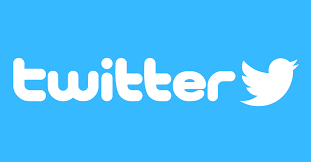



# Introduction

Sentiment Analysis is a technique used in text mining. It may, therefore, be described as a text mining technique for analyzing the underlying sentiment of a text message, i.e., a tweet. Twitter sentiment or opinion expressed through it may be positive, negative or neutral.


As a part of Natural Language Processing, algorithms like Naive Bayes is used in predicting the polarity of the sentence. 


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
%matplotlib inline
import seaborn as sns

C:\Users\Dhamo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhamo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhamo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading the Dataset

In [3]:
# reading the dataset using pandas
Train_df = pd.read_csv('train.csv')
Test_df = pd.read_csv('test.csv')

# Quick peek inside

In [4]:
Train_df.head()  # first five rows in the dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
Test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
Train_df.tail()  # last five rows in the dataset

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [7]:
Test_df.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


# About the dataset

## Shape of dataset

In [8]:
Train_df.shape # shape of dataset

(31962, 3)

In [9]:
Test_df.shape
#it shows number of rows and columns in a  test dataset

(17197, 2)

## Finding unique

In [10]:
Train_df.nunique()

id       31962
label        2
tweet    29530
dtype: int64

In [11]:
Test_df.nunique()

id       17197
tweet    16130
dtype: int64

## Stastical values about dataset

In [12]:
Train_df.describe()
#Generative descriptive statistics

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [13]:
Test_df.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


## Little deep info

In [14]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [15]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


# Cleaning and sorting data

## Checking null values

In [16]:
Train_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [17]:
Test_df.isnull().sum()

id       0
tweet    0
dtype: int64

## Lemmatize the dataset

In [18]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets


In [19]:
# Cleaning the dataset 
Train_df['hashtag'] = Train_df.tweet.apply(extract_hashtag)

In [20]:
# Extracting positive words from dataset
from nltk import FreqDist 
pos_hashtag = FreqDist(list((" ".join(Train_df.hashtag)).split())).most_common(10)
pos_hashtag

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364)]

In [21]:
# Extracting negative words from dataset
neg_hashtag = FreqDist(list((" ".join(Train_df[Train_df['label']==1]['hashtag'])).split())).most_common(10)
neg_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32)]

In [22]:
train_pos_hashtag = pd.DataFrame(pos_hashtag, columns=['words', 'frequency'])
train_neg_hashtag = pd.DataFrame(neg_hashtag, columns=['words', 'frequency'])
print("    ==Positive==")
print(train_pos_hashtag.head())
print('----------------------')
print("    ==Negative==")
print(train_neg_hashtag.head())

    ==Positive==
      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471
----------------------
    ==Negative==
       words  frequency
0      trump        134
1   politics         95
2  allahsoil         92
3    libtard         76
4    liberal         75


In [23]:
print(len(Train_df[Train_df.label == 0]), 'Positive')
print(len(Train_df[Train_df.label == 1]), 'Negative')

29720 Positive
2242 Negative


# Data Preprocessing

In [24]:
#removig stopwords on train file
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## cleaning the dataset

In [25]:
# removing the word `@user`
Train_df['tweet']=Train_df['tweet'].apply(lambda x: x.replace('@user',' '))

In [26]:
# removing the special charecters
import re
def clean_tweet(a):
    remove_unwanted_char=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return remove_unwanted_char

In [27]:
Train_df.tweet = Train_df.tweet.apply(clean_tweet)
Train_df.head()

,id,label,tweet,hashtag
0,1,0,when a father is dysfunctional and is so selfi...,run
1,2,0,thanks for lyft credit i can't use cause they ...,lyft disapointed getthanked
2,3,0,bihday your majesty,
3,4,0,model i love u take with u all the time in ur,model
4,5,0,factsguide society now motivation,motivation


In [28]:
#removing hyperlinks and user ID on test file
Test_df.tweet = Test_df.tweet.apply(clean_tweet)
Test_df['tweet']=Test_df['tweet'].apply(lambda x: x.replace('@user',' '))
Test_df.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see t...
2,31965,safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew eli ...


In [29]:
#Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
Train_df.tweet=Train_df.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()])) # v stands for verb
Train_df.head()

,id,label,tweet,hashtag
0,1,0,when a father be dysfunctional and be so selfi...,run
1,2,0,thank for lyft credit i can't use cause they d...,lyft disapointed getthanked
2,3,0,bihday your majesty,
3,4,0,model i love u take with u all the time in ur,model
4,5,0,factsguide society now motivation,motivation


In [30]:
#Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
Test_df.tweet=Test_df.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()])) # v stands for verb
Test_df.head()

,id,tweet
0,31963,studiolife aislife require passion dedication ...
1,31964,user white supremacists want everyone to see t...
2,31965,safe ways to heal your acne altwaystoheal heal...
3,31966,be the hp and the curse child book up for rese...
4,31967,3rd bihday to my amaze hilarious nephew eli ah...


# Exploration and Visualization

## Unique Positive Words

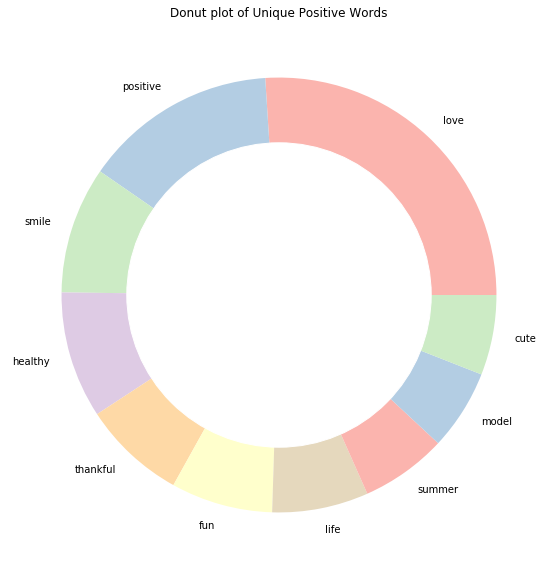

In [31]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(14,10))
circle = plt.Circle((0,0),0.7, color='white')
plt.pie(train_pos_hashtag['frequency'], labels = train_pos_hashtag.words, colors=Pastel1_7.hex_colors)
plt.gcf().gca().add_artist(circle)
plt.title("Donut plot of Unique Positive Words")
plt.show()

## Unique Negative Words

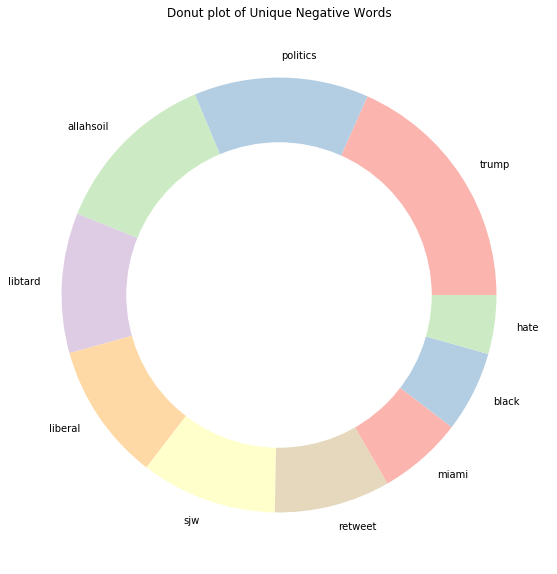

In [32]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(14,10))
circle = plt.Circle((0,0),0.7, color='white')
plt.pie(train_neg_hashtag['frequency'], labels = train_neg_hashtag.words, colors=Pastel1_7.hex_colors)
plt.gcf().gca().add_artist(circle)
plt.title("Donut plot of Unique Negative Words")
plt.show()

## Label count in Training dataset

Text(0.5, 1.0, 'Label count')

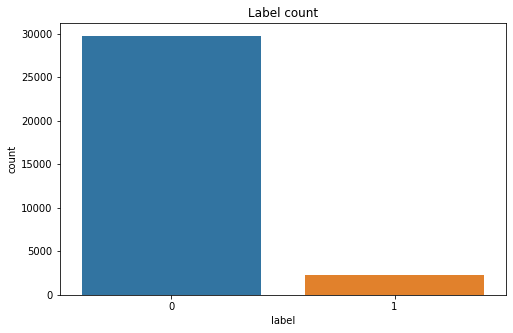

In [33]:
plt.figure(figsize = (8,5))
sns.countplot(x='label',data = Train_df)
plt.rc('font',size=10)
plt.title("Label count")

## Sentiment analysis using Pie chart

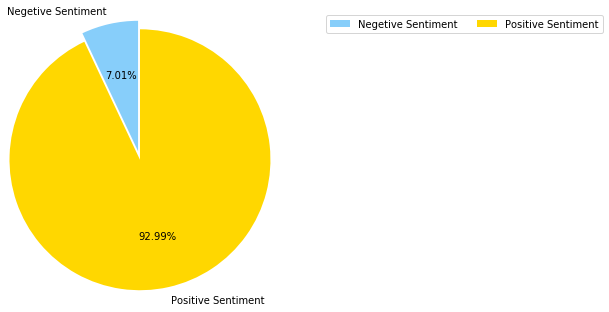

In [34]:
sentiments = ['Negetive Sentiment', 'Positive Sentiment'] 
slices = [(Train_df['label'] != 0).sum(), (Train_df['label'] == 0).sum()] 
colors = ['lightskyblue', 'gold'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, 
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend(loc="upper center", bbox_to_anchor=(2, 1.15), ncol=2)
plt.show()


## Checking the distribution of tweets in the data

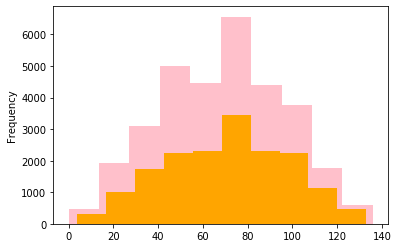

In [35]:
length_train = Train_df['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = Test_df['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

## Word cloud 

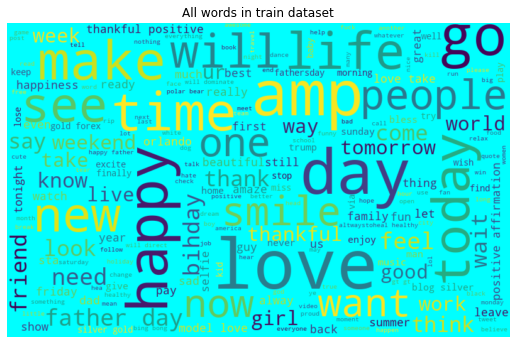

In [36]:
#Visualizing all the words in Train_df
all_words = ' '.join([text for text in Train_df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(9, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('All words in train dataset')
plt.show()

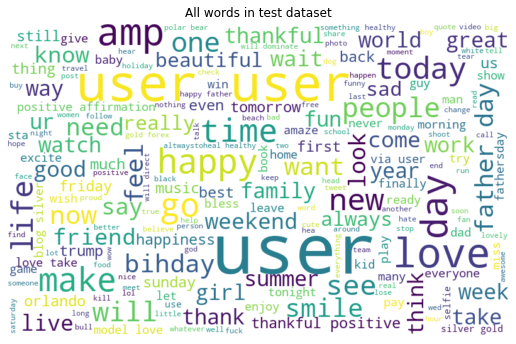

In [37]:
#Visualizing all the words in Test_df
all_words = ' '.join([text for text in Test_df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(9, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('All words in test dataset')
plt.show()

Text(0.5, 1.0, 'The Positive Words')

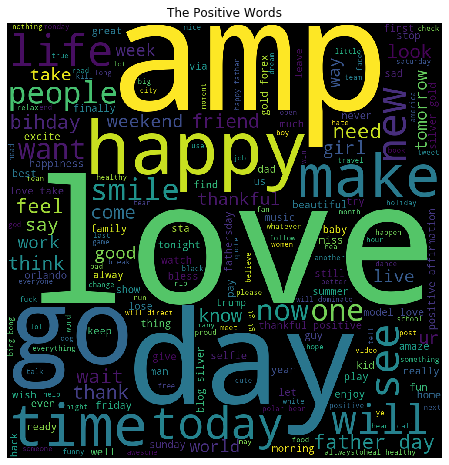

In [38]:
#Visualizing all the positive words in train_df
positive_words = ' '.join([text for text in Train_df['tweet']])
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(positive_words)
plt.figure(figsize=(9,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('The Positive Words')

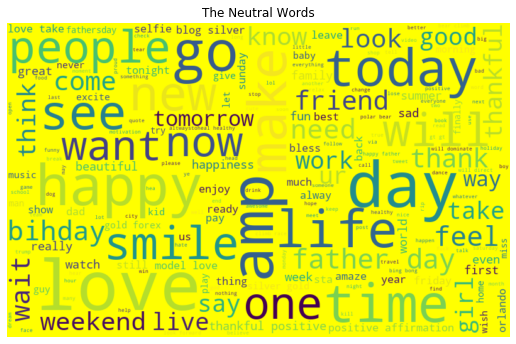

In [39]:
#Visualizing normal words in train_df
normal_words =' '.join([text for text in Train_df['tweet'][Train_df['label'] == 0]])

wordcloud = WordCloud(background_color= 'yellow' , width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(9, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

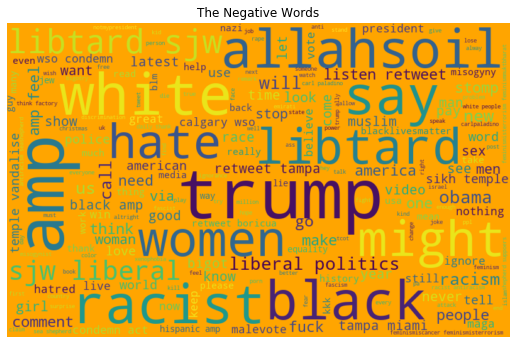

In [40]:
#Visualizing all the negative words in train_df
negative_words =' '.join([text for text in Train_df['tweet'][Train_df['label'] == 1]])

wordcloud = WordCloud(background_color = 'orange', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(9, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

# Building Machine Learning Models

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(Train_df['tweet'])

# final_vectorized_data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, Train_df['label'],test_size=0.2, random_state=69)

In [43]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (25569, 445611)
X_test_shape :  (6393, 445611)
y_train_shape :  (25569,)
y_test_shape :  (6393,)


In [44]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB 
model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
#print("Accuracy with Naive-bayes: ",score_naive)
print("Accuracy with Naive-bayes:",round(score_naive*100,3), "%")

Accuracy with Naive-bayes: 93.9 %
